# QTM 531 Assignment 3
# Ao Lyu (Lorna)

#### This project uses text analysis to extract the names of members of Congress that are engaging in legislative behavior, employing text analysis to extract and scrutinize specific elements from a dataset of unstructured text. I will be working be real text from bills and actions from the 116th Congress of the United States, which legislated in Washington, D.C., on January 3, 2019, and ended on January 3, 2021, during the final two years of Donald Trump's presidency.More information about the 166th Congress can be found here:
#### https://en.wikipedia.org/wiki/116th_United_States_Congress

### Insights:

#### In an unprecedented analysis of 3,303 legislative bills, our project unravels the complex tapestry of U.S. legislative dynamics focusing on the pulsating heart of political collaboration and amendment processes. Here is what stands out:
#### **One surprising focus on amendments**: of all the bills analyzed, almost half (46.29%) relate to amendments, showing a legislative landscape that is deep in investment towards the refinement and progression of laws. Indeed, such vibrant activity speaks loudly about this very agility in legislation, which becomes an answer to multiple exigencies and intricacies thrown up by society's plurality.
#### **Key figures like Mr. Pallone and Mr. Takano each have 72 mentions**—the spotlight is on them, underlining their paramount roles regarding the legislative discourse. Their prominence and other notable mentions would make one presume a legislative marketplace driven by influential personalities and collaborative efforts.

#### **The Power of the Network**: Senator McConnell is a clear standout in this network, co-sponsoring an unusually large number of bills. While usual analyses of this position mainly focus on mathematical probabilities, it examines the content of the collaboration networks and unveils the essence of legislative success, partnership, and influence, with very much openness to the intricate dance of power and strategy occurring in the Senate.

#### This project reveals not only the legislative processes currently ongoing but also the vibrancy of their collaborative spirit and pursuit of legislative excellence. 



In [75]:
# Import necessary package
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Descriptive Analysis

In [4]:
# Import the dataset 
bills_actions = pd.read_csv("/Users/aolyu/Documents/GitHub/qtm531spring2024"
                            +"/Lecture 10/data_raw/bills_actions.csv")

# Display dataset
#bills_actions.head()

In [60]:
# Count the total number of bills 
# bills_actions["category"]


In [71]:
# Count the proportion of different category of bills
category_counts = bills_actions["category"].value_counts()
category_proportions = (category_counts / category_counts.sum()) * 100

category_proportions

# Creating a DataFrame
df_categories = pd.DataFrame(bills_actions).set_index('category')

# Round the numbers to two decimal places
category_proportions_rounded = category_proportions.round(2)

# Capitalize each category name
category_proportions_rounded.index = category_proportions_rounded.index.str.capitalize()

# Convert to DataFrame for a better presentation
category_proportions_df = category_proportions_rounded.reset_index()
category_proportions_df.columns = ['Category', 'Percentage of Bills']

# Display the DataFrame
category_proportions_df
# Round the numbers to 1 or two decimal places.
# Add a heading to the table call: Percentage of bills
# Recode text to start with a capital letter


,Category,Percentage of Bills
0,Amendment,46.29
1,House bill,27.31
2,Senate bill,15.56
3,House resolution,7.08
4,Senate resolution,1.82
5,House joint resolution,0.67
6,House concurrent resolution,0.61
7,Senate concurrent resolution,0.42
8,Senate joint resolution,0.24


In [63]:
# Creating a separate DataFrame for each category with their respective proportions of main actions
categories = bills_actions['category'].unique()

# Dictionary to hold the dataframes for each category
category_dfs = {}

for category in categories:
    df_temp = bills_actions[bills_actions['category'] == category]\
    ['main_action'].value_counts(normalize=True).reset_index()
    df_temp.columns = ['Main Action', 'Proportion']
    df_temp['Proportion'] = df_temp['Proportion'] * 100  
    category_dfs[category] = df_temp

# Display the dataframe
# category_dfs


##### The dataset comprises a total of 3303 legislative bills, and there is significant variation in the distribution of bills across different categories. Amendments constituted the largest category, accounting for approximately 46.29% of all bills, indicating a high level of legislative activity in modifying existing laws or proposals. House bills and Senate bills followed, making up 27.31% and 15.56% of the dataset. Other categories, such as House and Senate resolutions, joint resolutions, and concurrent resolutions, collectively contributed to the remaining proportions.

##### An in-depth study of the types of actions associated with the various types of bills reveals distinctive patterns of legislative process and activity.  For example, in the amendment category, "House amendment offered" was the predominant action. For house and senate bills, actions such as "House floor actions" and "Senate committee/subcommittee actions" dominated, reflecting the critical pathways through which bills progress in each chamber.

## Focused Examination

### Analyze house floor actions within senate bills

In [8]:
# Dictionary to hold the dataframes for each category
category_dfs = {}

for category in categories:
    df_temp = bills_actions[bills_actions['category'] == category]\
    ['main_action'].value_counts().reset_index()
    df_temp.columns = ['Main Action', 'Count']
    df_temp['Count'] = df_temp['Count']  
    category_dfs[category] = df_temp

# Display senate bill
category_dfs["senate bill"]

,Main Action,Count
0,senate committee/subcommittee actions,335
1,house floor actions,116
2,senate committee report filed after reporting,33
3,reported to senate,17
4,senate floor actions,7
5,resolving differences -- house actions,6


### Obtaining summary statistics

In [72]:
# Filtering the dataset 
senate_bills_house_actions = bills_actions[(bills_actions['category'] \
                            == 'senate bill') & (bills_actions['main_action']\
                            == 'house floor actions')]

# Total number of house floor actions as part of senate bills
total_house_floor_actions = len(senate_bills_house_actions)

# Proportion of these actions that were suspended
suspended_actions = senate_bills_house_actions['action'].\
                    str.contains('suspend').mean()


# Proportion of these actions that were suspended as amended
suspended_as_amended_actions = senate_bills_house_actions['action'].\
                    str.contains('suspend.*as amended').mean()

# Creating a DataFrame to hold the results, rounded to two decimal places
results_df = pd.DataFrame({
    'Metric': ['Total House Floor Actions', \
               'Suspended Actions (%)', \
                'Suspended as Amended Actions (%)'],
    'Value': [total_house_floor_actions, \
              round(suspended_actions*100, 2), \
              round(suspended_as_amended_actions*100, 2)]
})

results_df


,Metric,Value
0,Total House Floor Actions,116.00
1,Suspended Actions (%),68.97
2,Suspended as Amended Actions (%),15.52


In [1]:
#display(senate_bills)

##### There are 116 instances of house floor actions as part of senate bills in the dataset. 68.97% of the house floor actions associated with senate bills were marked as suspended. And 15.52% of the house floor actions were documented as being suspended as amended. 

### Active participation of certain individuals in legislative actions

In [77]:
# Extract names using the regular expression pattern
name_pattern = r'\b(Mr\.|Ms\.|Mrs\.)\s+([A-Za-z]+)'

# Applying the regular expression to extract names from the 'action' column
bills_actions['extracted_names'] = bills_actions['action'].\
    apply(lambda x: re.findall(name_pattern, x))

# Creating a new dataframe with each name and the corresponding bill
all_names = []
for index, row in bills_actions.iterrows():
    for name in row['extracted_names']:
        all_names.append((' '.join(name), row['bill_number']))

# Converting the list to a DataFrame
names_df = pd.DataFrame(all_names, columns=['Name', 'Bill Number'])

# Counting how many bills mention the same person
name_counts = names_df['Name'].value_counts()

# Distribution of total bills proposed per person
name_distribution = name_counts.value_counts()


# name_counts, name_distribution 


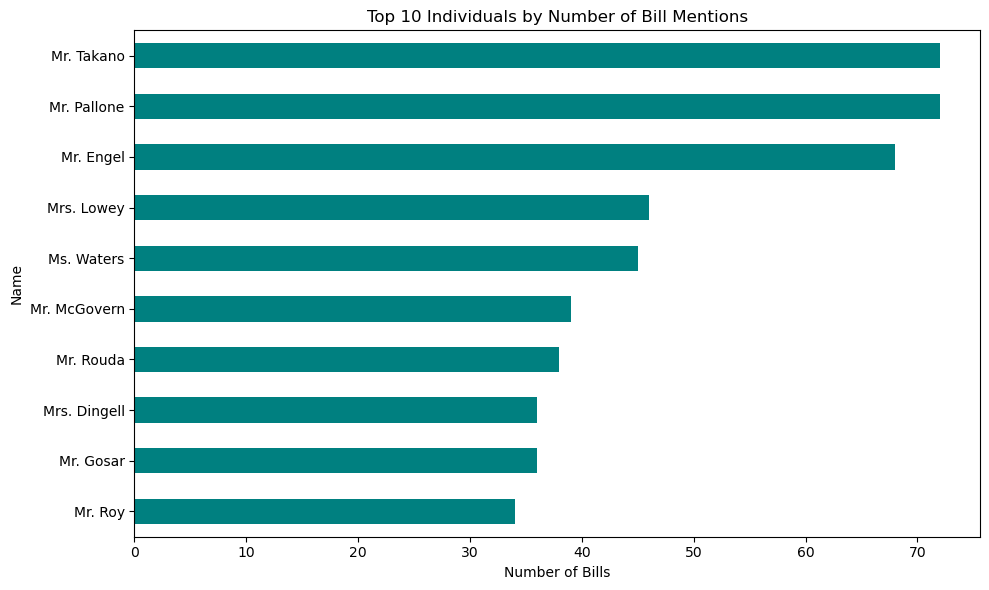

In [90]:
# Selecting the top 10 individuals for visualization
top_10_name_counts = name_counts.nlargest(10)

# Sorting the top 10 name counts for better visualization
sorted_top_10_name_counts = top_10_name_counts.sort_values(ascending=True)

# Creating the bar chart for the top 10 individuals
plt.figure(figsize=(10, 6))
sorted_top_10_name_counts.plot(kind='barh', color='teal')
plt.title('Top 10 Individuals by Number of Bill Mentions')
plt.xlabel('Number of Bills')
plt.ylabel('Name')
plt.tight_layout()

plt.show()

##### Mr. Pallone and Mr. Takano are the top mentioned individuals, each appearing in 72 bills. Mr. Engel is next, with mentions in 68 bills. Mrs. Lowey and Ms. Waters also have a significant number of mentions, with 46 and 45 bills respectively.

##### A considerable number of individuals (55) are mentioned in only one bill, indicating a wide distribution of mentions across various people.A descending frequency of mentions is observed with other individuals being mentioned in 2 to 25 bills.

##### The distribution suggests that while a few individuals may have a prominent role, there is a wide engagement across many members. 

### The involvement of senators and the patterns of coauthorship among them

In [38]:
# Filter the dataset for bills with actions marked as "senate amendment proposed (on the floor)"
senate_amendment_bills = bills_actions[bills_actions['action'].str.contains('proposed')]
# senate_amendment_bills

In [ ]:
senate_amendment_bills['senators'] = senate_amendment_bills["action"].str.findall("Senator\s+([A-Za-z]+)")
# senate_amendment_bills['senators']

# HIDE MESSAGE FROM PYTHON CODE

In [53]:
# Create a new DataFrame to count how many senators are mentioned per bill
senators_per_bill_df = senate_amendment_bills.copy()
senators_per_bill_df['Senator 1'] = senators_per_bill_df['senators'].\
    apply(lambda x: x[0] if len(x) > 0 else "NA")
senators_per_bill_df['Senator 2'] = senators_per_bill_df['senators'].\
    apply(lambda x: x[1] if len(x) > 1 else "NA")
senators_per_bill_df['Number of senators'] = \
    senators_per_bill_df['senators'].apply(len)

# Distribution of number of senators per bill
senator_distribution = senators_per_bill_df['Number of senators'].\
    value_counts()

# Recode the variable names
senators_per_bill_df["Bill Number"]= senators_per_bill_df["bill_number"]

# Selecting relevant columns for the new dataset
senators_per_bill_df = senators_per_bill_df\
    [['Bill Number', 'Senator 1', 'Senator 2', 'Number of senators']]

# Displaying the new dataset and the distribution of number of senators per bill
senators_per_bill_df

,Bill Number,Senator 1,Senator 2,Number of senators
0,1029,McConnell,Cornyn,2
1,1031,Hawley,NA,1
2,1160,McConnell,Smith,2
8,1253,Feinstein,Cornyn,2
11,1309,McConnell,Cardin,2
...,...,...,...,...
2947,6201,Johnson,NA,1
2948,6201,Murray,NA,1
2949,6201,Paul,NA,1
3155,8337,McConnell,NA,1


In [101]:
# Distribution of the numbers of the senators
senator_distribution

# Change series into dataframe
senator_distribution_df = pd.DataFrame(senator_distribution)

# Reset index
senator_distribution_df.reset_index(inplace=True)

# Recode
senator_distribution_df.columns = ['Number of Senators', 'Frequency']

senator_distribution_df


,Number of Senators,Frequency
0,2,196
1,1,90


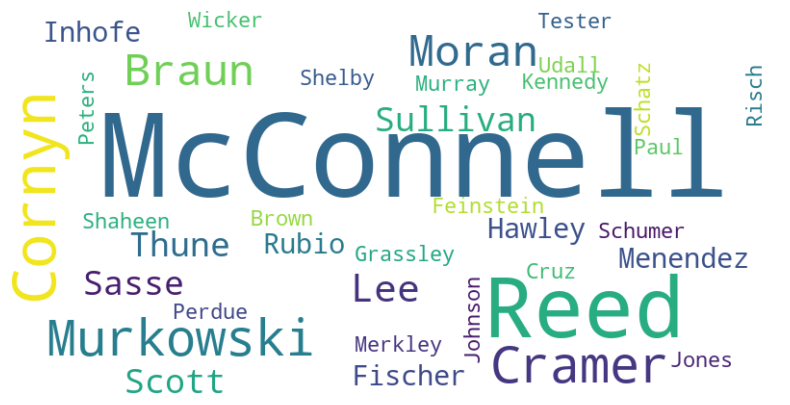

In [84]:
# Filter out rows where 'Senator 1' or 'Senator 2' is NA
coauthor_data = senators_per_bill_df.dropna(subset=['Senator 1', 'Senator 2'])

# Group by 'Senator 1' and count unique 'Senator 2' entries
coauthor_counts = coauthor_data.groupby('Senator 1')['Senator 2'].nunique()

# Sort the Series in descending order
sorted_coauthor_counts = coauthor_counts.sort_values(ascending= False)
sorted_coauthor_counts

# Creating a word cloud from the sorted_coauthor_counts_data
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(sorted_coauthor_counts)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

##### This data reflects the collaborative network of senators in proposing amendments. Senator McConnell has a significantly higher number of co-sponsors, which may reflect his leadership position, a more active legislative agenda, or a longer tenure. On the other hand, many senators have only one co-sponsor, which could mean that they are less active in offering amendments, that they prefer to work independently, or that they are new to the Senate and are still building their networks.